<img src="images/usm.jpg" width="480" height="240" align="left"/>

# MAT281 - Laboratorio N°04

## Objetivos del laboratorio

* Reforzar conceptos básicos de reducción de dimensionalidad.

## Contenidos

* [Problema 01](#p1)


<a id='p1'></a>
## I.- Problema 01


<img src="https://www.goodnewsnetwork.org/wp-content/uploads/2019/07/immunotherapy-vaccine-attacks-cancer-cells-immune-blood-Fotolia_purchased.jpg" width="360" height="360" align="center"/>


El **cáncer de mama**  es una proliferación maligna de las células epiteliales que revisten los conductos o lobulillos mamarios. Es una enfermedad clonal; donde una célula individual producto de una serie de mutaciones somáticas o de línea germinal adquiere la capacidad de dividirse sin control ni orden, haciendo que se reproduzca hasta formar un tumor. El tumor resultante, que comienza como anomalía leve, pasa a ser grave, invade tejidos vecinos y, finalmente, se propaga a otras partes del cuerpo.

El conjunto de datos se denomina `BC.csv`, el cual contine la información de distintos pacientes con tumosres (benignos o malignos) y algunas características del mismo.


Las características se calculan a partir de una imagen digitalizada de un aspirado con aguja fina (FNA) de una masa mamaria. Describen las características de los núcleos celulares presentes en la imagen.
Los detalles se puede encontrar en [K. P. Bennett and O. L. Mangasarian: "Robust Linear Programming Discrimination of Two Linearly Inseparable Sets", Optimization Methods and Software 1, 1992, 23-34].


Lo primero será cargar el conjunto de datos:

In [29]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
import random
from sklearn.metrics import classification_report


%matplotlib inline
sns.set_palette("deep", desat=.6)
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [2]:
# cargar datos
df = pd.read_csv(os.path.join("data","BC.csv"), sep=",")
df['diagnosis'] = df['diagnosis'] .replace({'M':1,'B':0})
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Basado en la información presentada responda las siguientes preguntas:


1. Normalizar para las columnas numéricas con procesamiento **StandardScaler**.
2. Realice un gráfico de correlación. Identifique la existencia de colinealidad.
3. Realizar un ajuste PCA con **n_components = 10**. Realice un gráfico de la varianza y varianza acumulada. Interprete.
4. Devuelva un dataframe con las componentes principales.
5. Aplique al menos tres modelos de clasificación. Para cada modelo, calule el valor de sus métricas.

In [3]:
x = df.loc[:, df.drop(['diagnosis', 'id'],axis=1).columns].values
y = df.loc[:, ['diagnosis']].values

x = StandardScaler().fit_transform(x)

<AxesSubplot:>

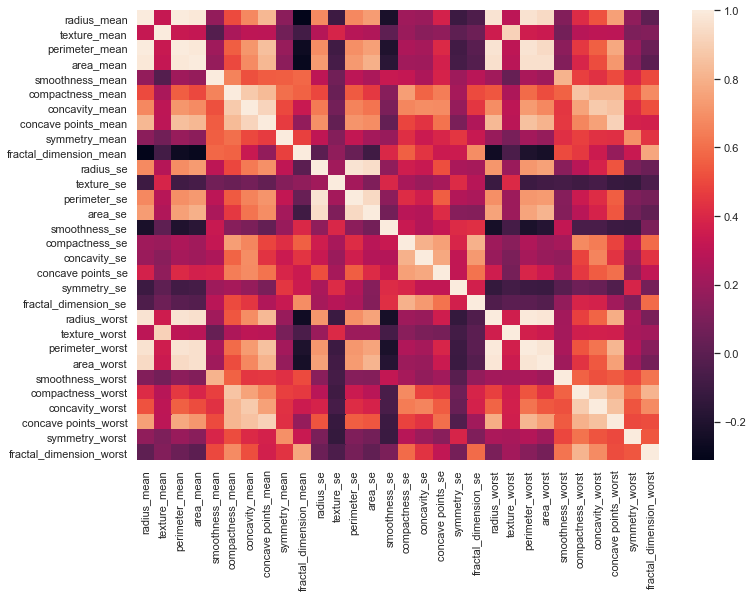

In [4]:
df_corr = df.drop(['diagnosis', 'id'],axis=1).corr()
sns.heatmap(df_corr, annot=False)

Vemos que existe colinealidad entre las variables "radius_mean", "area_mean", "perimeter_mean", "radius_worst", "area_worst", "perimeter_worst"

In [7]:
columns=[]

for i in range(1,11):
    st= 'PC'
    st= 'PC'+ str(i)
    columns.append(st)

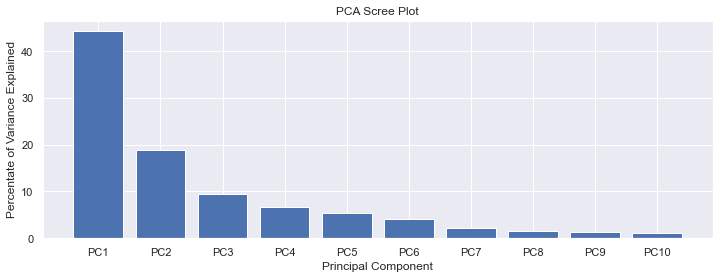

In [9]:
pca = PCA(n_components=10)
principalComponents = pca.fit_transform(x)

# graficar varianza por componente
percent_variance = np.round(pca.explained_variance_ratio_* 100, decimals =2)

plt.figure(figsize=(12,4))
plt.bar(x= range(1,11), height=percent_variance, tick_label=columns)
plt.ylabel('Percentate of Variance Explained')
plt.xlabel('Principal Component')
plt.title('PCA Scree Plot')
plt.show()

In [10]:
string='PC1'
columns_2=[str]

for i in range(1,len(columns)):
    string = string + '+' + columns[i]
    columns_2.append(string)

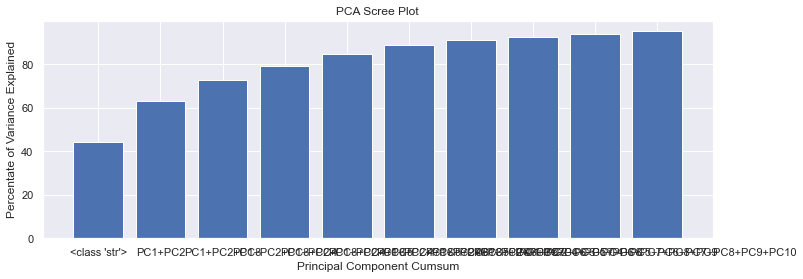

In [11]:
# graficar varianza por la suma acumulada de los componente
percent_variance_cum = np.cumsum(percent_variance)

plt.figure(figsize=(12,4))
plt.bar(x= range(1,11), height=percent_variance_cum, tick_label=columns_2)
plt.ylabel('Percentate of Variance Explained')
plt.xlabel('Principal Component Cumsum')
plt.title('PCA Scree Plot')
plt.show()

In [12]:
percent_variance_cum

array([44.27, 63.24, 72.63, 79.23, 84.73, 88.75, 91.  , 92.59, 93.98,
       95.15])

In [18]:
columns[:7]

['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7']

Tenemos que se pueden explicar la varianza de las variables con un 91% considerando las primeras 7 componentes principales 

In [21]:
pca = PCA(n_components=7)

principalComponents = pca.fit_transform(x)

principalDataframe = pd.DataFrame(data = principalComponents, columns = columns[:7])
targetDataframe = df[['diagnosis']]

newDataframe = pd.concat([principalDataframe, targetDataframe],axis = 1)
newDataframe.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,diagnosis
0,9.192837,1.948583,-1.123166,3.633731,-1.195111,1.411426,2.159374,1
1,2.387802,-3.768172,-0.529293,1.118264,0.621775,0.028656,0.013358,1
2,5.733896,-1.075174,-0.551748,0.912083,-0.177086,0.541453,-0.668167,1
3,7.122953,10.275589,-3.232790,0.152547,-2.960878,3.053422,1.429905,1
4,3.935302,-1.948072,1.389767,2.940639,0.546748,-1.226496,-0.936216,1


### Entrenar Modelos

In [43]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Perceptron
from sklearn import tree

X_train, X_test, Y_train, Y_test = train_test_split(principalDataframe, targetDataframe, test_size=0.2, random_state = 42)

### SVC

In [44]:
regr_1= SVC()
regr_1.fit(X_train,Y_train)
target_names = ['clase 0', 'clase 1']
print(classification_report(Y_test, regr_1.predict(X_test), target_names=target_names))

              precision    recall  f1-score   support

     clase 0       0.97      0.99      0.98        71
     clase 1       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



C:\Users\maxi1\miniconda3\envs\mat281\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


### Decision Tree

In [45]:
regr_2=tree.DecisionTreeClassifier()
regr_2.fit(X_train,Y_train)
target_names = ['clase 0', 'clase 1']
print(classification_report(Y_test, regr_2.predict(X_test), target_names=target_names))

              precision    recall  f1-score   support

     clase 0       0.97      0.93      0.95        71
     clase 1       0.89      0.95      0.92        43

    accuracy                           0.94       114
   macro avg       0.93      0.94      0.94       114
weighted avg       0.94      0.94      0.94       114



### Logistic Regression

In [46]:
regr_3=LogisticRegression()
regr_3.fit(X_train,Y_train)
target_names = ['clase 0', 'clase 1']
print(classification_report(Y_test, regr_3.predict(X_test), target_names=target_names))

              precision    recall  f1-score   support

     clase 0       0.99      0.99      0.99        71
     clase 1       0.98      0.98      0.98        43

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



C:\Users\maxi1\miniconda3\envs\mat281\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


### Perceptron

In [47]:
regr_4=Perceptron()
regr_4.fit(X_train,Y_train)
target_names = ['clase 0', 'clase 1']
print(classification_report(Y_test, regr_4.predict(X_test), target_names=target_names))

              precision    recall  f1-score   support

     clase 0       0.97      0.99      0.98        71
     clase 1       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



C:\Users\maxi1\miniconda3\envs\mat281\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
